# Proyek Machine Learning Pemula: Beverage Sales Dataset 
- **Nama:** Audy Nadira Ramadanti
- **Email:** audynadiraramdanti@gmail.com
- **ID Dicoding:** audy_nadira_ramadanti_zWZ9

# **1. Perkenalan Dataset**


Dataset ini dibuat untuk mensimulasikan pola penjualan yang realistis dalam industri minuman, dengan menyoroti faktor-faktor penting seperti preferensi regional, fluktuasi musiman, dan segmentasi pelanggan. Dataset ini mencakup transaksi Business-to-Business (B2B) dan Business-to-Consumer (B2C), sehingga dapat digunakan untuk berbagai tujuan analitis.  

Dataset ini diperoleh dari Kaggle dan dapat diakses melalui tautan berikut:  
[http://kaggle.com/datasets/sebastianwillmann/beverage-sales](http://kaggle.com/datasets/sebastianwillmann/beverage-sales)  
[https://www.kaggle.com/datasets/sebastianwillmann/beverage-sales](https://www.kaggle.com/datasets/sebastianwillmann/beverage-sales)  

Berikut adalah deskripsi setiap kolom dalam dataset:  

- **Order_ID**: Identifikasi unik untuk setiap pesanan, yang mengelompokkan beberapa produk dalam satu pesanan.  
- **Customer_ID**: Identifikasi unik untuk setiap pelanggan, membedakan setiap pembeli.  
- **Customer_Type**: Menunjukkan apakah pelanggan adalah B2B (business-to-business) atau B2C (business-to-consumer).  
- **Product**: Nama produk yang dibeli, seperti "Coca-Cola" atau "Erdinger Weißbier".  
- **Category**: Kategori produk, seperti "Soft Drinks" atau "Alcoholic Beverages".  
- **Unit_Price**: Harga per unit dari produk.  
- **Quantity**: Jumlah unit produk yang dibeli dalam pesanan tertentu.  
- **Discount**: Diskon yang diterapkan pada produk (misalnya, 0.1 untuk 10%). Diskon hanya diberikan kepada pelanggan B2B.  
- **Total_Price**: Total harga produk setelah diskon diterapkan.  
- **Region**: Wilayah pelanggan, seperti "Bayern" atau "Berlin".  
- **Order_Date**: Tanggal ketika pesanan dilakukan.  


# **2. Import Library**

Sebelum menjalankan kode dalam proyek ini, pastikan semua dependensi yang diperlukan telah terinstal. Gunakan perintah berikut untuk menginstal pustaka yang dibutuhkan:

In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn kmodes

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from kmodes.kprototypes import KPrototypes

Sebelum memulai pemrosesan data, saya memerlukan beberapa library yang dapat membantu dalam **manipulasi**, **analisis**, dan **pemodelan**. Berikut adalah penjelasan singkat mengenai masing-masing library yang digunakan:

1. **Pandas**  
   Digunakan untuk **manipulasi** dan **analisis** data. Library ini menyediakan struktur data **DataFrame** dan **Series** yang memudahkan proses membaca, menulis, menggabungkan, dan memfilter dataset.

2. **NumPy**  
   Menyediakan array multidimensi yang efisien dan fungsi matematika untuk perhitungan numerik. NumPy sering digunakan sebagai **fondasi** bagi library lain di Python, terutama yang berhubungan dengan sains data.

3. **Matplotlib**  
   Memungkinkan **pembuatan grafik** dan **visualisasi data** secara dasar, seperti plot garis, histogram, dan scatter plot. Sangat berguna untuk menampilkan pola atau distribusi data secara visual.

4. **Seaborn**  
   Memperluas kemampuan Matplotlib dengan **visualisasi statistik** yang lebih menarik dan mudah dipahami. Cocok untuk membuat grafik yang lebih **informasi-rich** seperti heatmap, box plot, pair plot, dan lain-lain.

5. **Scikit-learn**  
   - **OneHotEncoder**: Mengubah fitur kategorikal menjadi **one-hot vectors** (variabel dummy) sehingga dapat diproses oleh algoritma pembelajaran mesin.  
   - **LabelEncoder**: Mengubah label/fitur kategorikal menjadi **nilai numerik** (0, 1, 2, ...). Berguna untuk algoritma yang tidak bisa langsung menangani data kategorikal.  
   - **MinMaxScaler**: Melakukan **normalisasi** fitur numerik ke dalam rentang [0, 1], sehingga **skala** setiap fitur seragam dan lebih mudah diolah oleh beberapa algoritma.  
   - **MiniBatchKMeans**: Varian **KMeans** yang lebih efisien dan cepat untuk dataset besar karena menggunakan batch data secara **iteratif**.  
   - **silhouette_score**: Metode untuk **mengevaluasi kualitas** hasil clustering. Mengukur seberapa baik objek-objek dikelompokkan dalam cluster masing-masing.  
   - **PCA (Principal Component Analysis)**: Teknik **reduksi dimensi** yang mengekstrak komponen utama dari dataset, membantu menyederhanakan data dengan tetap mempertahankan sebagian besar variansinya.  
   - **KMeans**: Algoritma **clustering** populer yang mempartisi data menjadi K kelompok berdasarkan jarak ke centroid.  

6. **kmodes.kprototypes**  
   - **KPrototypes**: Digunakan untuk menangani data **mixed type** (gabungan numerik dan kategorikal). Mengombinasikan konsep KMeans dan KModes agar bisa mengelompokkan data dengan tipe fitur campuran.

7. **sklearn.feature_selection**  
   - **VarianceThreshold**: Metode **feature selection** yang menghapus fitur dengan **varians rendah**, karena fitur tersebut biasanya kurang bermanfaat dalam membedakan antar data.

Dengan library-library ini, kita dapat **menangani data** (membaca, membersihkan, menggabungkan), **menyiapkan fitur** (encoding, scaling, seleksi), serta **menerapkan algoritma clustering** dan **evaluasi** secara efisien.

# **3. Memuat Dataset**

In [3]:
data = pd.read_csv("data\synthetic_beverage_sales_data.csv")

Untuk membaca file csv saya menggunakan fungsi `read_csv` dari library **Pandas** dan nama dataset yang saya pakai ialah *synthetic_beverage_sales_data.csv* yang terletak di folder `data`. File ini berisi data terkait penjualan minuman di kota-kota Germany,  yang nantinya akan saya proses lebih lanjut untuk analisis dan pemodelan clustering.

# **4. Exploratory Data Analysis (EDA)**

In [4]:
#Type your code here

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999910 entries, 0 to 8999909
Data columns (total 11 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Order_ID       object 
 1   Customer_ID    object 
 2   Customer_Type  object 
 3   Product        object 
 4   Category       object 
 5   Unit_Price     float64
 6   Quantity       int64  
 7   Discount       float64
 8   Total_Price    float64
 9   Region         object 
 10  Order_Date     object 
dtypes: float64(3), int64(1), object(7)
memory usage: 755.3+ MB


Untuk awalan saya menggunakan **`data.info()`**  agar mengetahui informasi umum mengenai dataset, seperti jumlah total data, tipe data tiap kolom, dan jumlah nilai non-null.  hal ini bertujuan untuk memahami struktur dataset dan mengidentifikasi apakah ada kolom yang perlu penanganan khusus atau konversi tipe data.

In [5]:
data.shape

(8999910, 11)

Selanjutnya saya gunakan **`data.shape`** untuk memberikan informasi terkait banyaknya data dan column yang dipunyai oleh dataset tersebut. dan terlihat jelas di hasil bahwa dataset ini memiliki hampir 9 juta data dengan 11 column

In [6]:
data.isna().sum()

Order_ID         0
Customer_ID      0
Customer_Type    0
Product          0
Category         0
Unit_Price       0
Quantity         0
Discount         0
Total_Price      0
Region           0
Order_Date       0
dtype: int64

Selanjutnya saya menggunakan **`data.isna().sum()`**  untuk menghitung jumlah nilai yang hilang (missing values) pada setiap kolom. Tujuan melakukan hal tersebut untuk mengetahui apakah ada data yang kosong dan menentukan strategi penanganan missing values. dan seperti yang kita lihat di hasil bahwa tidak ada missing values

In [7]:
data[data.duplicated()]

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date


Next saya menggunakan **`data[data.duplicated()]`**  untuk mendeteksi baris-baris duplikat dalam dataset. Hal ini sangant berguna untuk memastikan keakuratan analisis dengan mengidentifikasi dan menghapus data yang berulang. Dan dari hasil yang diperlihatkan bahwa tidak ada data yang terduplikasi

In [8]:
data.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,ORD1,CUS1496,B2B,Vio Wasser,Water,1.66,53,0.10,79.18,Baden-Württemberg,2023-08-23
1,ORD1,CUS1496,B2B,Evian,Water,1.56,90,0.10,126.36,Baden-Württemberg,2023-08-23
2,ORD1,CUS1496,B2B,Sprite,Soft Drinks,1.17,73,0.05,81.14,Baden-Württemberg,2023-08-23
3,ORD1,CUS1496,B2B,Rauch Multivitamin,Juices,3.22,59,0.10,170.98,Baden-Württemberg,2023-08-23
4,ORD1,CUS1496,B2B,Gerolsteiner,Water,0.87,35,0.10,27.40,Baden-Württemberg,2023-08-23


 **`data.head()`**  saya gunakan untuk menampilkan beberapa baris pertama dari dataset. hal ini berfungsi agar memberikan gambaran awal kepada saya terkait isi data dan struktur kolom.

C:\Users\FX506\AppData\Local\Temp\ipykernel_11792\3801711046.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


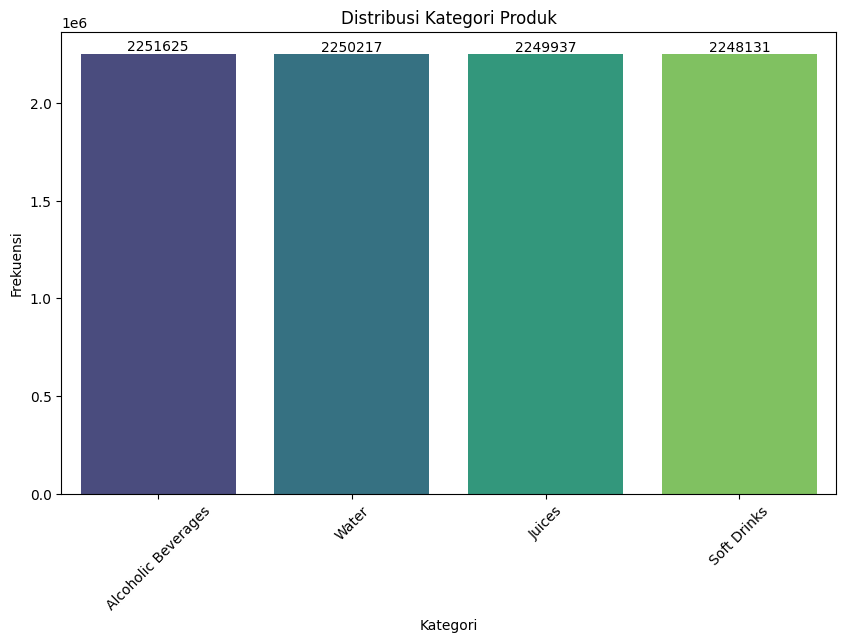

In [9]:
# Menghitung frekuensi tiap kategori
category_counts = data['Category'].value_counts()

plt.figure(figsize=(10,6))
ax = sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.xlabel('Kategori')
plt.ylabel('Frekuensi')
plt.title('Distribusi Kategori Produk')
plt.xticks(rotation=45)  # Rotasi label sumbu-x agar mudah dibaca

# Menambahkan anotasi total angka di atas setiap bar
for index, value in enumerate(category_counts.values):
    ax.text(index, value, str(value), color='black', ha="center", va="bottom")

plt.show()

Pada tahap eksplorasi data, saya menggunakan `value_counts()` pada kolom **Category** untuk mengetahui jumlah masing-masing kategori. Tujuannya adalah untuk memahami distribusi produk berdasarkan kategori, yang dapat membantu mengidentifikasi apakah terdapat ketimpangan (imbalance) atau dominasi kategori tertentu.  
  
Untuk memudahkan pembacaan, hasil perhitungan frekuensi setiap kategori divisualisasikan menggunakan grafik batang (bar plot) dari Seaborn. Hal ini mempermudah interpretasi dan memungkinkan kita melihat secara langsung jumlah data pada masing-masing kategori. Selain itu, penambahan anotasi pada grafik memudahkan kita untuk membandingkan nilai frekuensi tanpa harus melihat data mentah.  
 
Berdasarkan hasil visualisasi, terlihat bahwa keempat kategori memiliki jumlah data yang relatif berdekatan. Dari grafik, “Alcoholic Beverages” memiliki frekuensi tertinggi (±2.251.625), disusul berturut-turut oleh “Water” (±2.250.217), “Juices” (±2.249.937), dan “Soft Drinks” (±2.248.131). 

Meskipun terdapat sedikit perbedaan jumlah antar kategori, selisihnya tidak terlalu signifikan. Hal ini menunjukkan bahwa tidak ada satu kategori yang mendominasi secara ekstrem. Dengan kata lain, distribusi data untuk keempat kategori ini terbilang cukup seimbang. Informasi ini dapat menjadi dasar untuk analisis selanjutnya, seperti melihat bagaimana tiap kategori berkontribusi terhadap penjualan total atau bagaimana performa masing-masing kategori dari waktu ke waktu.

C:\Users\FX506\AppData\Local\Temp\ipykernel_11792\3298396591.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=customer_type_counts.index, y=customer_type_counts.values, palette='magma')


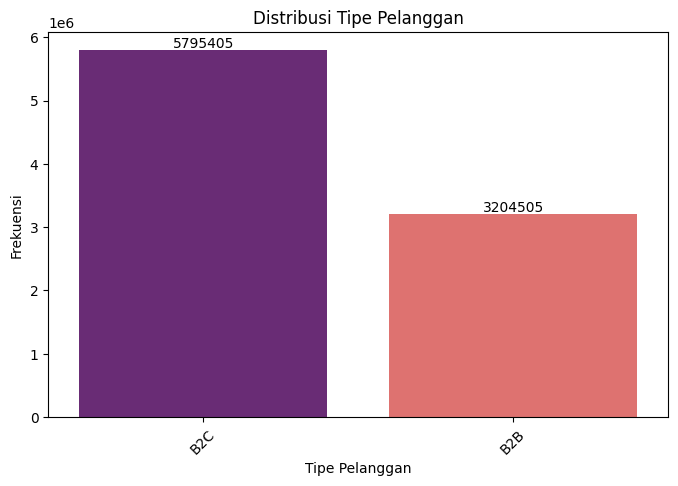

In [10]:
# Menghitung frekuensi tiap nilai Customer_Type
customer_type_counts = data['Customer_Type'].value_counts()

plt.figure(figsize=(8,5))
ax = sns.barplot(x=customer_type_counts.index, y=customer_type_counts.values, palette='magma')
plt.xlabel('Tipe Pelanggan')
plt.ylabel('Frekuensi')
plt.title('Distribusi Tipe Pelanggan')
plt.xticks(rotation=45)

# Menambahkan anotasi angka di atas setiap bar
for index, value in enumerate(customer_type_counts.values):
    ax.text(index, value, str(value), color='black', ha='center', va='bottom')

plt.show()

Selanjutnya di tahap ini, saya menggunakan `value_counts()` pada kolom **Customer_Type** untuk menghitung frekuensi masing-masing tipe pelanggan. Tujuannya adalah untuk mengidentifikasi sebaran tipe pelanggan dalam dataset serta memahami segmentasi pelanggan yang ada. Dengan mengetahui tipe pelanggan yang paling dominan, kita dapat menyesuaikan strategi pemasaran atau analisis lebih lanjut terhadap segmen tersebut.  

Hasil perhitungan kemudian divisualisasikan dalam bentuk grafik batang (bar chart) menggunakan Seaborn, sehingga memudahkan kita dalam membandingkan dan menginterpretasikan jumlah data di setiap tipe pelanggan.

Berdasarkan grafik yang ditampilkan, tipe pelanggan **B2C** memiliki jumlah data yang lebih tinggi, yaitu sekitar 5.795.405, sedangkan **B2B** berada di kisaran 3.204.505. Hal ini menunjukkan bahwa pelanggan B2C lebih dominan dalam dataset dibandingkan dengan B2B. Informasi ini dapat menjadi acuan untuk analisis selanjutnya, misalnya strategi penjualan yang lebih berfokus pada pelanggan B2C atau pengembangan program khusus bagi segmen B2B.

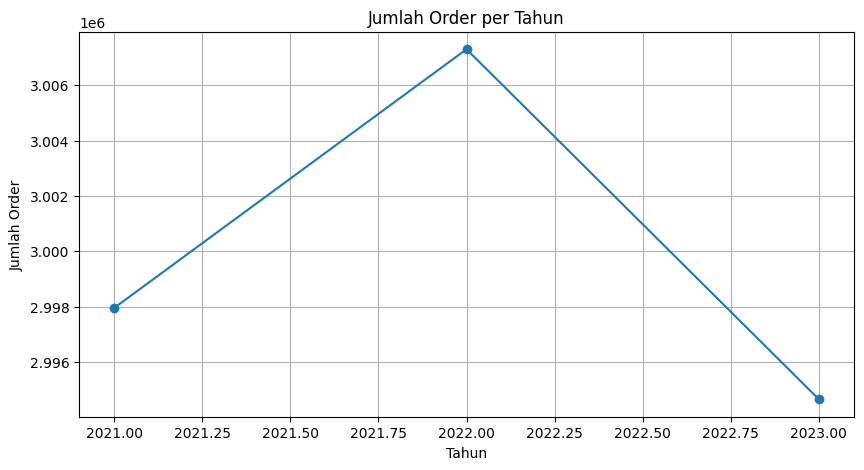

In [11]:
# Pastikan kolom Order_Date sudah dikonversi ke datetime
data['Order_Date'] = pd.to_datetime(data['Order_Date'])

# Hitung jumlah order per tahun
order_counts = data['Order_Date'].dt.year.value_counts().sort_index()

# Visualisasi menggunakan line chart
plt.figure(figsize=(10,5))
plt.plot(order_counts.index, order_counts.values, marker='o', linestyle='-')
plt.title("Jumlah Order per Tahun")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Order")
plt.grid(True)
plt.show()


Pada tahap ini, kolom **Order_Date** terlebih dahulu dikonversi ke tipe data datetime menggunakan `pd.to_datetime()`, agar data tanggal dapat diolah dengan benar untuk berbagai analisis waktu seperti ekstraksi tahun, bulan, atau hari. Setelah itu, kita menghitung jumlah order per tahun dan menampilkannya melalui line chart untuk melihat tren perkembangan pesanan. Berdasarkan grafik, terlihat bahwa jumlah order pada tahun 2021 berada di kisaran 2,99 juta, kemudian meningkat hingga mencapai lebih dari 3 juta pada tahun 2022, dan kembali menurun di tahun 2023 menjadi sekitar 2,98–2,99 juta. Pola ini menunjukkan adanya peningkatan penjualan di tahun 2022, diikuti oleh penurunan pada tahun 2023. Informasi ini dapat menjadi acuan dalam melakukan analisis lebih lanjut mengenai faktor-faktor yang memengaruhi tren tersebut, seperti kondisi pasar, promosi, atau perilaku konsumen, sehingga dapat ditentukan strategi penjualan yang tepat.

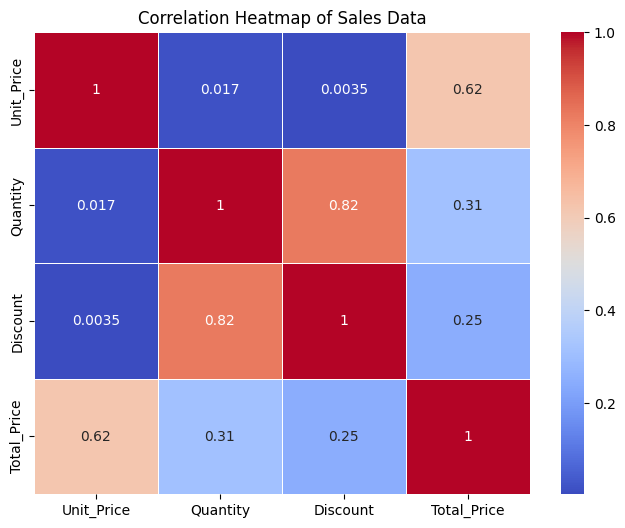

In [12]:
# Hitung korelasi antar fitur numerik
corr = data[['Unit_Price', 'Quantity', 'Discount', 'Total_Price']].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Sales Data")
plt.show()

Pada tahap ini, saya melakukan ekspolarasi data pada fitur-fitur numerik, yaitu **Unit_Price**, **Quantity**, **Discount**, dan **Total_Price**, menggunakan metode `.corr()`. Tujuannya adalah untuk mengidentifikasi hubungan linear antarvariabel dan memahami seberapa besar pengaruh masing-masing fitur terhadap penjualan. Selanjutnya, hasil korelasi divisualisasikan dalam bentuk heatmap dengan anotasi, sehingga memudahkan kita untuk melihat secara langsung mana fitur yang memiliki hubungan kuat ataupun lemah.

Berdasarkan heatmap, **Quantity** dan **Discount** memiliki korelasi positif yang cukup tinggi (±0.82), menunjukkan bahwa saat diskon meningkat, jumlah barang yang dibeli juga cenderung meningkat. **Unit_Price** memiliki korelasi sedang dengan **Total_Price** (±0.62), menandakan bahwa kenaikan harga satuan umumnya berbanding lurus dengan total penjualan. Sementara itu, **Discount** dan **Total_Price** menunjukkan korelasi yang lebih rendah (±0.25), sehingga pengaruh diskon terhadap total penjualan tidak sekuat variabel lain. Informasi ini dapat membantu kita dalam menyusun strategi penetapan harga dan promosi yang lebih efektif.

### **Kesimpulan Hasil Eksplorasi**

Berdasarkan hasil eksplorasi data di atas, dapat disimpukan bahwa saya dapat melakukan **clustering pelanggan berdasarkan profil pembelian** dengan mempertimbangkan faktor-faktor berikut:  

1. **Tipe Pelanggan (Customer_Type: B2B vs. B2C)** → Karena B2B cenderung melakukan pembelian dalam jumlah besar dengan diskon.  
2. **Total Harga Pembelian (Total_Price)** → Untuk membedakan pelanggan dengan pengeluaran tinggi dan rendah.  
3. **Jumlah Produk yang Dibeli (Quantity)** → Sebagai indikator apakah pelanggan membeli dalam jumlah besar atau kecil.  
4. **Diskon yang Diterima (Discount, hanya untuk B2B)** → Untuk mengidentifikasi pelanggan B2B yang sering mendapatkan harga lebih murah.  
5. **Wilayah Pelanggan (Region)** → Untuk mengelompokkan pelanggan berdasarkan lokasi geografis, yang bisa mempengaruhi kebiasaan belanja.  

### **Output yang Diharapkan dari Clustering**  
Setelah menerapkan clustering, pelanggan dapat dikelompokkan menjadi:  
1. **Low-spending Customers** → Pelanggan dengan pembelian kecil.  
2. **High-spending Customers** → Pelanggan dengan pembelian besar.  

📌 **Langkah Selanjutnya:**  
Hasil clustering ini kemudian dapat digunakan sebagai **label untuk model klasifikasi** yang dapat memprediksi segmen pelanggan baru berdasarkan pola pembelian mereka.  


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

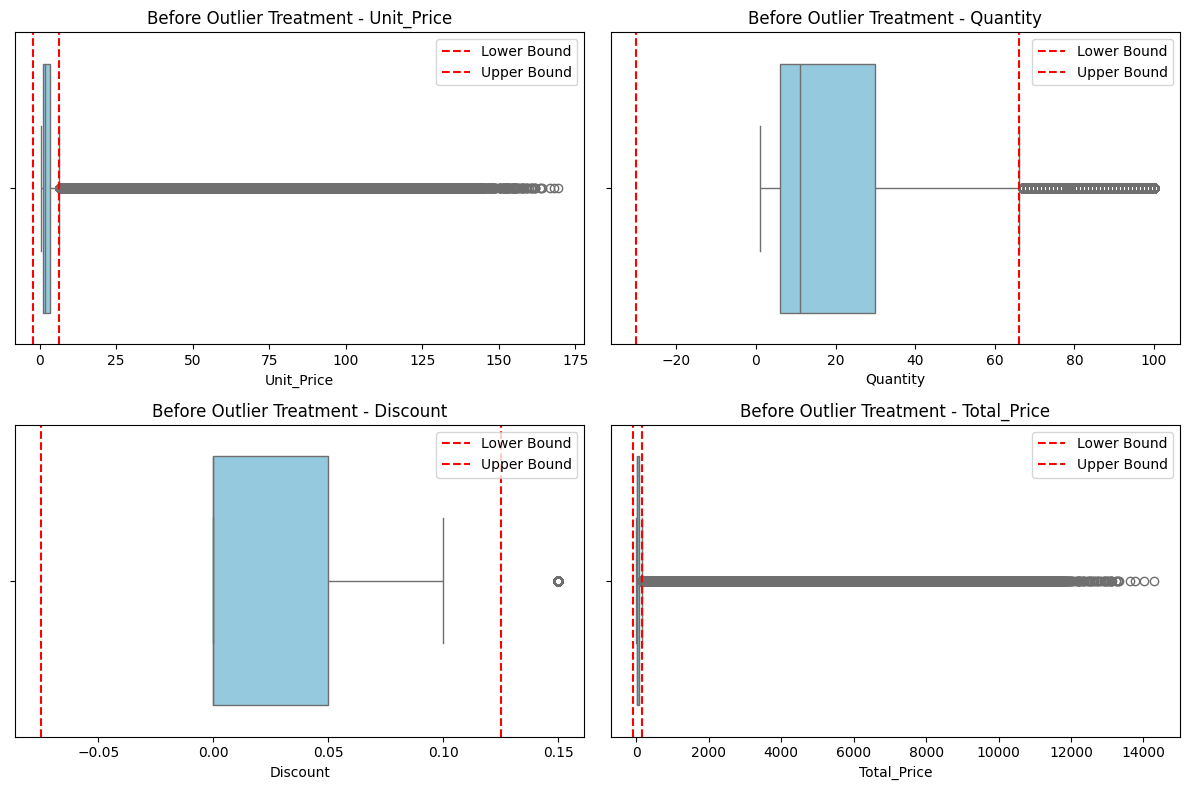

In [13]:
# ========================
# 1. Visualisasi Outlier (Sebelum dan Sesudah Penanganan)
# ========================
numerical_cols = ['Unit_Price', 'Quantity', 'Discount', 'Total_Price']

# Visualisasi sebelum penanganan outlier
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    sns.boxplot(x=data[col], color='skyblue')
    plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
    plt.axvline(upper_bound, color='red', linestyle='--', label='Upper Bound')
    plt.title(f"Before Outlier Treatment - {col}")
    plt.legend(loc='upper right')
plt.tight_layout()
plt.show()



Karena pada tahap eksplorasi data tidak terdapat missing values dan duplikasi data, maka saya lanjut ke tahap mencari outlier dari kolom numerik di tahap pre processing ini. So, di tahap ini, saya melakukan perhitungan **Q1 (kuartil 1)**, **Q3 (kuartil 3)**, dan **Interquartile Range (IQR)** untuk tiap fitur numerik (seperti **Unit_Price**, **Quantity**, **Discount**, dan **Total_Price**) berguna untuk menentukan batas bawah serta batas atas deteksi outlier. Tujuan dari tahap ini ialah mengukur persebaran data dan mengenali nilai-nilai ekstrem yang berpotensi mengganggu analisis atau pemodelan. Selanjutnya, hasilnya divisualisasikan melalui **boxplot**, di mana garis putus-putus berwarna merah menandakan batas bawah (Lower Bound) dan batas atas (Upper Bound) outlier. Berdasarkan gambar, tampak bahwa **Unit_Price** dan **Total_Price** memiliki sebaran yang cukup lebar dengan banyak titik data di luar batas atas, menandakan adanya nilai harga satuan dan total penjualan yang jauh lebih tinggi dibandingkan mayoritas data. Sementara itu, **Quantity** juga menunjukkan beberapa outlier, namun tidak sebanyak **Unit_Price** dan **Total_Price**. Pada kolom **Discount**, terdapat beberapa outlier meskipun jumlahnya lebih sedikit. Dengan informasi ini, kita dapat memutuskan apakah akan menghapus, mengubah (transform), atau menyesuaikan outlier tersebut agar tidak memengaruhi hasil analisis atau performa model secara signifikan.

In [14]:
# Penanganan outlier: capping menggunakan IQR
for col in numerical_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
    data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])



Karena ditemukannnya banyak outlier di fitur numerik jadi saya akan mengatasinya mmenggunakan ...metode **capping menggunakan IQR**. Dengan metode ini, kita pertama-tama menghitung kuartil bawah (Q1) dan kuartil atas (Q3), lalu menentukan **Interquartile Range (IQR)** sebagai selisih antara Q3 dan Q1. Setelah itu, kita menetapkan **batas bawah (lower bound)** = Q1 - 1.5 * IQR dan **batas atas (upper bound)** = Q3 + 1.5 * IQR. Nilai-nilai yang berada di luar batas ini (baik di bawah lower bound maupun di atas upper bound) akan “dipaksa” (di-capping) menjadi nilai batas tersebut.

Proses ini membantu “menjinakkan” nilai ekstrem yang dapat memengaruhi analisis, terutama dalam pemodelan yang sensitif terhadap outlier. Dari grafik boxplot sebelum capping (seperti pada gambar), tampak bahwa beberapa nilai di kolom **Unit_Price**, **Quantity**, **Discount**, dan **Total_Price** berada jauh dari mayoritas data (outlier). Dengan capping, kita menggeser nilai ekstrem agar tidak terlalu mempengaruhi distribusi data. 

Secara ringkas, langkah-langkahnya adalah:
1. **Hitung Q1 dan Q3** untuk setiap kolom numerik.
2. **Hitung IQR** = Q3 - Q1.
3. **Tentukan batas bawah dan atas**:
   - Lower bound = Q1 - 1.5 * IQR
   - Upper bound = Q3 + 1.5 * IQR
4. **Lakukan capping**:
   - Jika ada nilai < lower bound, ganti dengan lower bound.
   - Jika ada nilai > upper bound, ganti dengan upper bound.

Dengan demikian, outlier yang sebelumnya terlihat pada boxplot akan “terbatasi” ke dalam rentang yang lebih wajar, sehingga data menjadi lebih stabil untuk analisis selanjutnya.

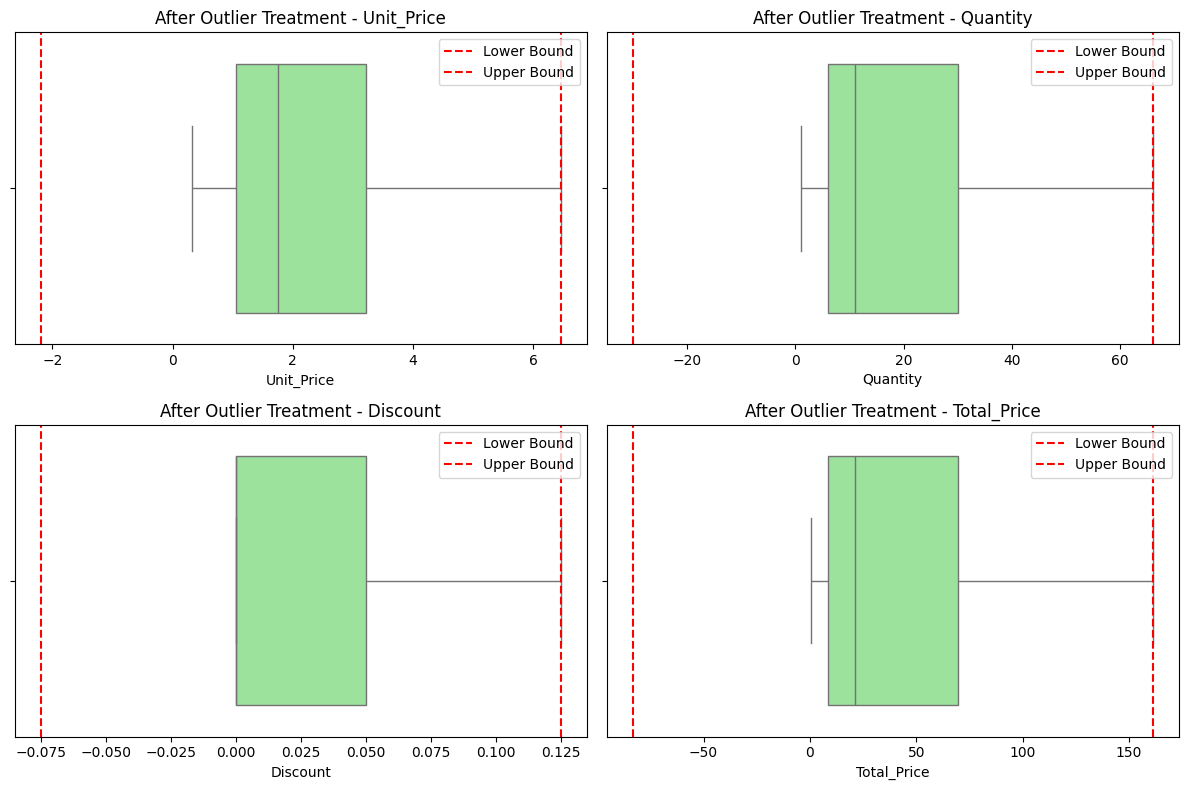

In [15]:
# Visualisasi sesudah penanganan outlier
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    sns.boxplot(x=data[col], color='lightgreen')
    plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
    plt.axvline(upper_bound, color='red', linestyle='--', label='Upper Bound')
    plt.title(f"After Outlier Treatment - {col}")
    plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


Dan untuk memastikan tidak ada outlier lagi saya melakukan **pengecekan ulang** terhadap distribusi data setelah proses capping. Salah satu caranya adalah dengan kembali menghitung **Q1**, **Q3**, dan **IQR** pada data hasil transformasi, lalu membandingkan nilai-nilai di setiap kolom dengan **lower bound** dan **upper bound** yang baru. Apabila tidak ada lagi nilai yang berada di luar rentang tersebut, maka secara teknis **tidak ada** outlier yang tersisa.

Selain itu, kita bisa melihatnya langsung dari boxplot pada grafik “After Outlier Treatment”: jika tidak ada lagi titik yang berada jauh di luar whiskers (garis boxplot), artinya data sudah berada di dalam batas yang ditentukan. Dengan demikian, kita dapat lebih yakin bahwa data telah bersih dari outlier yang berlebihan dan siap digunakan untuk analisis atau pemodelan lebih lanjut.

In [16]:
# ========================
# 2. Encoding Fitur Kategorik
# ------------------------
# Customer_Type bisa dibiarkan untuk one-hot (jika hanya ada 2 kelas) atau juga di-label encode.
# Di sini, hanya Region yang diubah ke label encoding karena banyak nilai unik.
le = LabelEncoder()
data['Region'] = le.fit_transform(data['Region'])

Pre-processing selanjutnya sebelum masuk ke dalam tahap pemodelan, saya melakukan encoding terhadap fitur-fitur kategorikal. Karena fitur-fitur tersebut memiliki nilai unik yang lumayan banyak, saya menggunakan Label Encoding. Metode ini mampu mengonversi setiap nilai kategorikal menjadi representasi numerik tanpa menambah jumlah kolom secara berlebihan, berbeda dengan One-Hot Encoding yang akan menghasilkan banyak kolom baru ketika jumlah kategori sangat banyak. Dalam kasus ini, kolom **`Region`** memiliki banyak nilai unik sehingga jika diterapkan One-Hot Encoding, jumlah kolom akan bertambah signifikan. Oleh karena itu, Label Encoding menjadi pilihan yang lebih praktis untuk mengatasi permasalahan ini. Perlu diingat bahwa Label Encoding mengasumsikan adanya hubungan ordinal antara label-label yang dihasilkan (misalnya 0 < 1 < 2 < 3), padahal pada konteks ID atau kategori wilayah, urutan semacam itu sebenarnya tidak bermakna. Meski demikian, untuk mempermudah pemrosesan data—terutama jika fitur tersebut hanya akan diperlakukan sebagai identitas atau kategori biasa—metode ini tetap dapat digunakan. Hasilnya, setiap nilai unik di dalam kolom tersebut akan digantikan oleh nilai integer yang mewakili kategori aslinya, sehingga data sudah siap untuk digunakan dalam tahap pemodelan yang membutuhkan input numerik.

In [17]:
ohe = OneHotEncoder(drop=None, sparse_output=False)  # drop=None untuk mempertahankan semua kategori
encoded = ohe.fit_transform(data[['Customer_Type']])

# Membuat DataFrame hasil encoding dengan nama kolom yang sesuai
encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(['Customer_Type']))

# Menggabungkan hasil one-hot encoding ke data asli dan menghapus kolom Customer_Type asli
data = pd.concat([data, encoded_df], axis=1).drop(columns=['Customer_Type'])

Selanjutnya karena customer type mempunyai hanya 2 nilai unique jadinya saya menggunakan one hot encoding. Hal ini karena **fitur dengan 2 kategori** akan menghasilkan **hanya 2 kolom baru** (masing-masing kolom mewakili salah satu kategori). Selain itu, **One-Hot Encoding** juga memastikan bahwa **model tidak menganggap** kedua kategori tersebut **memiliki hubungan ordinal** (seperti yang bisa terjadi jika kita menggunakan Label Encoding). 

Jadi, untuk kasus kolom **`Customer_Type`** yang hanya memiliki 2 nilai unik (misalnya “Regular” dan “VIP”), One-Hot Encoding:
1. **Mudah diinterpretasikan** (kolom baru merepresentasikan kategori tertentu dengan nilai 0/1).
2. **Tidak membuat dimensi data membengkak**, karena hanya menghasilkan dua kolom tambahan.
3. **Menghindari asumsi ordinal** yang dapat muncul jika menggunakan Label Encoding.

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999910 entries, 0 to 8999909
Data columns (total 12 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Order_ID           object        
 1   Customer_ID        object        
 2   Product            object        
 3   Category           object        
 4   Unit_Price         float64       
 5   Quantity           float64       
 6   Discount           float64       
 7   Total_Price        float64       
 8   Region             int32         
 9   Order_Date         datetime64[ns]
 10  Customer_Type_B2B  float64       
 11  Customer_Type_B2C  float64       
dtypes: datetime64[ns](1), float64(6), int32(1), object(4)
memory usage: 789.6+ MB


Selanjutnya saya ingin mengecek **struktur data** yang saya punyai setelah melakukan encoding. Dengan menjalankan Perintah `data.info()`  saya dapat melihat informasi seperti:

- **Jumlah baris dan kolom** dalam DataFrame.
- **Nama-nama kolom** beserta tipe datanya.
- **Jumlah nilai non-null** (tidak kosong) pada tiap kolom.
- Memastikan bahwa semua fitur kategorikal telah terencoding dengan benar (misalnya, kolom-kolom yang telah di-one-hot encoding dan label encoding sekarang sudah berupa tipe numerik).

Dengan demikian, langkah ini merupakan bagian penting dari proses **data pre-processing** untuk memastikan bahwa data siap untuk tahap pemodelan berikutnya.

In [19]:
data.drop(columns=['Customer_ID', 'Order_ID'],inplace=True)

Saya menghapus kolom 'Customer_ID' dan 'Order_ID' karena kedua fitur tersebut berisi nilai unik yang berfungsi sebagai identifier dan tidak memberikan informasi yang relevan untuk proses clustering. Dengan mengeluarkan fitur-fitur tersebut, model akan lebih fokus pada variabel-variabel yang memiliki peran signifikan dalam membentuk pola dan kelompok data, sehingga membantu menghasilkan cluster yang lebih bermakna dan interpretasi yang lebih jelas.

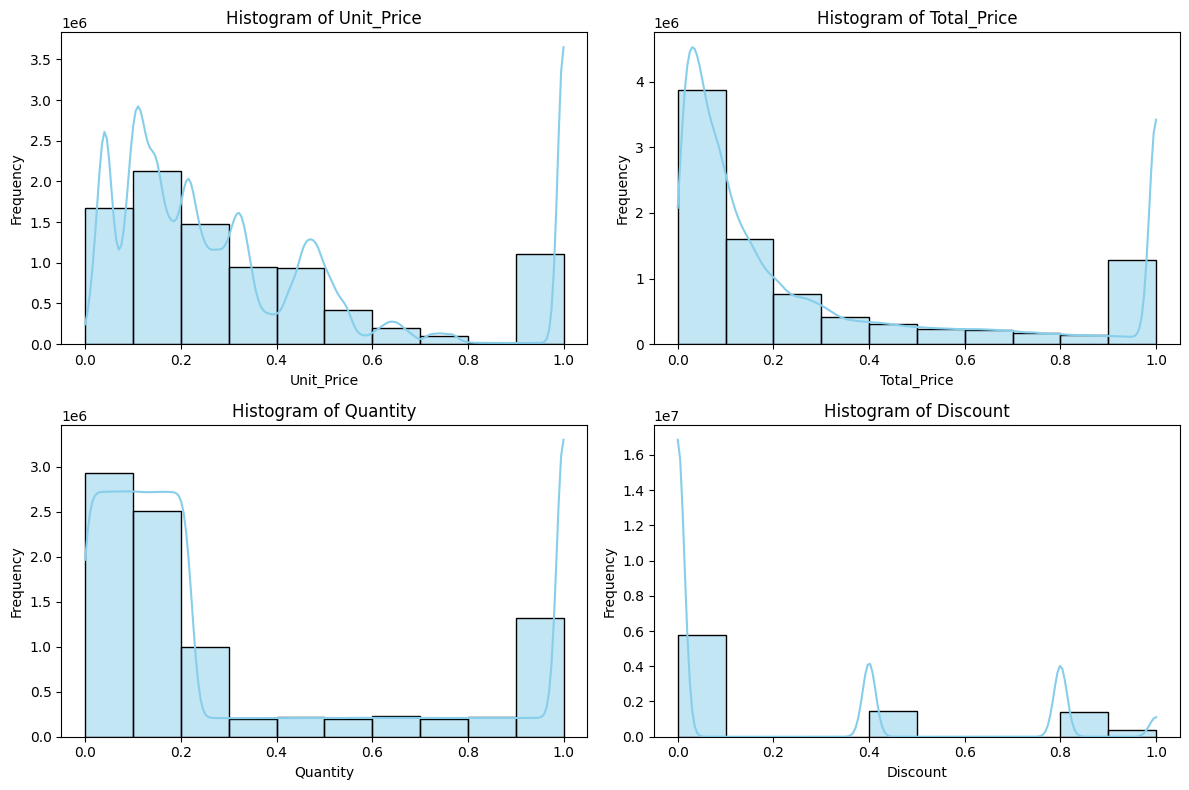

In [20]:
scaler = MinMaxScaler()
columns_to_normalize = ['Unit_Price', 'Total_Price', 'Quantity', 'Discount']
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

# Plot histogram
plt.figure(figsize=(12, 8))
for i, col in enumerate(columns_to_normalize, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[col], bins=10, kde=True, color='skyblue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Terakhir, untuk memastikan bahwa penyebaran data lebih merata dan tidak ada fitur yang mendominasi karena perbedaan skala, saya melakukan normalisasi menggunakan **MinMaxScaler**. Dengan normalisasi ini, setiap nilai pada fitur **Unit_Price**, **Total_Price**, **Quantity**, dan **Discount** diubah ke rentang [0, 1]. 

Hal ini penting karena:
- **Mengurangi Bias Skala:** Fitur dengan nilai yang jauh lebih besar tidak mendominasi perhitungan dalam algoritma clustering (misalnya, K-Means yang sensitif terhadap perbedaan skala).
- **Mempertahankan Bentuk Distribusi:** MinMaxScaler tidak mengubah distribusi asli data, sehingga karakteristik penyebaran tetap terjaga.
- **Konsistensi Data:** Data yang telah dinormalisasi memudahkan interpretasi dan perbandingan antar fitur saat analisis dan pemodelan.

Setelah proses normalisasi, saya membuat histogram untuk masing-masing fitur untuk memastikan bahwa data telah terdistribusi secara baik dan merata. Histogram dengan plot distribusi (dilengkapi KDE) membantu visualisasi apakah data sudah siap untuk tahap clustering.

# **6. Pembangunan Model Clustering**

In [21]:
sample_size = 10_000
train_data= data.sample(n=sample_size, random_state=42).copy()

## **a. Pembangunan Model Clustering**

In [22]:
features = [
    'Customer_Type_B2B', 'Customer_Type_B2C', 
    'Total_Price', 'Quantity', 'Discount', 'Region', 'Unit_Price'
]

# Konversi data ke tipe float32
X_full = train_data[features].astype(np.float32)

# Range jumlah cluster
k_range = range(2, 11)

# --- Model 1: MiniBatchKMeans (menggunakan data PCA) ---
mbk_models = {}
mbk_inertia = []
mbk_labels = {}
mbk_silhouette = {}

for k in k_range:
    mbk = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=10000)
    labels = mbk.fit_predict(X_full)
    mbk_models[k] = mbk
    mbk_inertia.append(mbk.inertia_)
    mbk_labels[k] = labels
    if len(set(labels)) > 1:
        mbk_silhouette[k] = silhouette_score(X_full, labels)
    # Tidak mencetak setiap iterasi

# --- Model 2: KMeans++ (menggunakan data PCA) ---
kmeans_models = {}
kmeans_inertia = []
kmeans_labels = {}
kmeans_silhouette = {}

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(X_full)
    kmeans_models[k] = kmeans
    kmeans_inertia.append(kmeans.inertia_)
    kmeans_labels[k] = labels
    if len(set(labels)) > 1:
        kmeans_silhouette[k] = silhouette_score(X_full, labels)
    # Tidak mencetak setiap iterasi

# --- Model 3: K-Prototypes (menggunakan data asli X_full) ---
# Untuk K-Prototypes, tentukan fitur kategori. Karena belum ada feature selection,
# gunakan list fitur asli sebagai 'final_features'.
final_features = features.copy()
# Anggap fitur kategori adalah:
categorical_features = ['Region', 'Customer_Type_B2B', 'Customer_Type_B2C', 'Customer_ID']
# Jika Customer_ID tidak diinginkan, hapus dari daftar
if 'Customer_ID' in categorical_features:
    categorical_features.remove('Customer_ID')

# Tentukan indeks kolom kategori dalam final_features
cat_idx = [final_features.index(f) for f in categorical_features]

kproto_range = range(2, 11)
kproto_models = {}
kproto_costs = []
kproto_labels = {}
kproto_silhouette = {}

for k in kproto_range:
    kproto = KPrototypes(n_clusters=k, init='Cao', random_state=42)
    labels = kproto.fit_predict(X_full, categorical=cat_idx)
    kproto_models[k] = kproto
    kproto_costs.append(kproto.cost_)
    kproto_labels[k] = labels
    if len(set(labels)) > 1:
        kproto_silhouette[k] = silhouette_score(X_full, labels)

Di tahap pemodelan clustering, saya menerapkan **tiga algoritma clustering** yang berbeda, yaitu:

1. **MiniBatchKMeans:**  
   Algoritma ini merupakan versi yang lebih cepat dan efisien dari KMeans, terutama untuk dataset besar. Dengan menggunakan batch kecil (dalam kode menggunakan batch_size=10.000), MiniBatchKMeans mampu mempercepat proses komputasi sambil tetap menghasilkan partisi yang baik. Hasil clustering dievaluasi menggunakan metrik inertia dan silhouette score untuk menentukan kualitas cluster.

2. **KMeans++ (KMeans dengan inisialisasi k-means++):**  
   Pendekatan ini membantu dalam pemilihan centroid awal yang lebih baik dibandingkan dengan inisialisasi acak. Dengan inisialisasi 'k-means++', algoritma ini dapat mengurangi kemungkinan terjebak pada solusi lokal yang buruk. Seperti MiniBatchKMeans, hasil clustering juga dievaluasi dengan metrik inertia dan silhouette score.

3. **K-Prototypes:**  
   Algoritma ini digunakan untuk menangani data dengan fitur campuran (numerik dan kategorikal). Dalam contoh kode, fitur seperti **Region**, **Customer_Type_B2B**, dan **Customer_Type_B2C** diperlakukan sebagai fitur kategorikal (dengan pengecualian **Customer_ID** yang dihapus jika tidak diinginkan). K-Prototypes menggabungkan mekanisme pengukuran jarak untuk data numerik dan kategorikal, sehingga sangat cocok untuk dataset dengan tipe data campuran. Evaluasi clustering dilakukan menggunakan metrik cost (sebagai analog inertia) dan silhouette score.

Langkah-langkah utama yang dilakukan dalam pemodelan clustering adalah:

- **Pengambilan sampel data:**  
  Karena data yang saya miliki berjumlah lebih dari 8 juta baris, untuk menghemat waktu komputasi dan sumber daya, saya hanya mengambil 10.000 baris sebagai sampel. Langkah ini membantu proses clustering menjadi lebih efisien tanpa mengorbankan representativitas data secara signifikan.

- **Konversi tipe data:**  
  Mengonversi fitur yang digunakan ke tipe `float32` untuk memastikan kompatibilitas dengan algoritma yang digunakan dan mendukung komputasi yang lebih cepat.

- **Iterasi jumlah cluster:**  
  Mencoba rentang jumlah cluster dari 2 hingga 10 untuk setiap algoritma, kemudian menyimpan model dan mengevaluasi kinerjanya berdasarkan inertia, cost, dan silhouette score untuk analisis selanjutnya.

Dengan pendekatan ini, saya dapat membandingkan performa masing-masing algoritma dan menentukan konfigurasi cluster yang optimal berdasarkan metrik evaluasi yang telah dihitung, sambil menjaga efisiensi komputasi mengingat besarnya volume data awal.

## **b. Evaluasi Model Clustering**

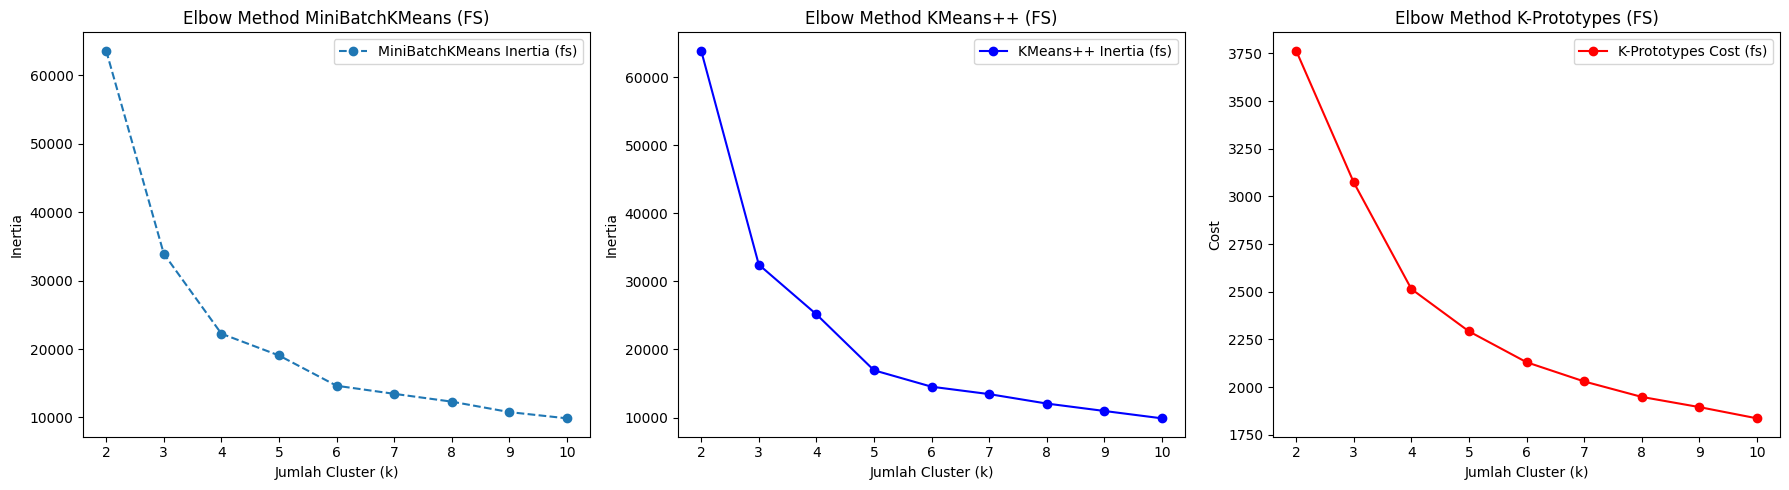

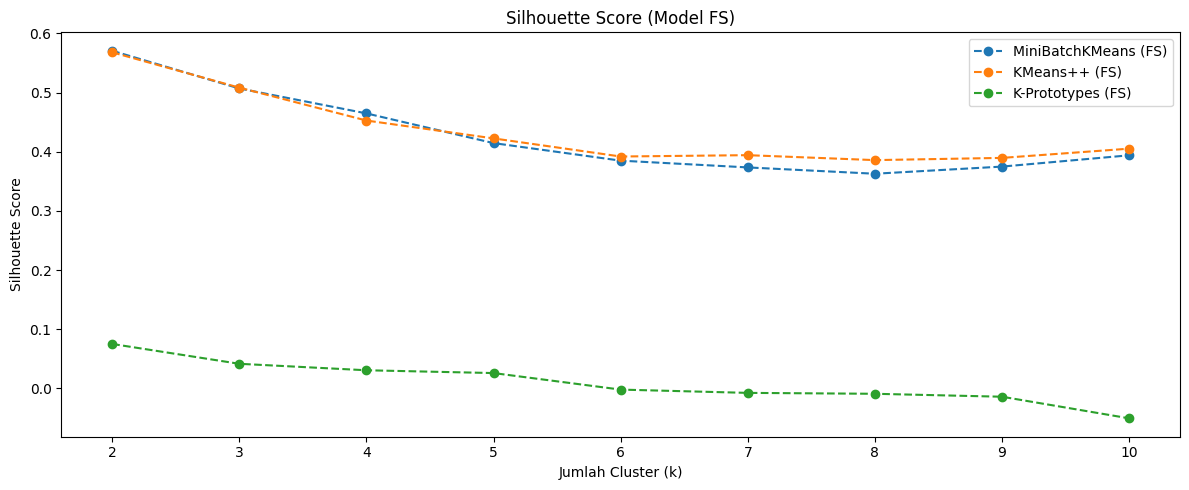


Evaluasi Model Setelah:
  MiniBatchKMeans (FS): k = 2, Silhouette Score = 0.5708
  KMeans++ (FS): k = 2, Silhouette Score = 0.5682
  K-Prototypes (FS): k = 2, Silhouette Score = 0.0752


In [23]:
# Subplot 1: Elbow Method untuk MiniBatchKMeans
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Elbow Method: MiniBatchKMeans (fs)
axes[0].plot(k_range, mbk_inertia, marker='o', linestyle='--', label='MiniBatchKMeans Inertia (fs)')
axes[0].set_xlabel('Jumlah Cluster (k)')
axes[0].set_ylabel('Inertia')
axes[0].set_title('Elbow Method MiniBatchKMeans (FS)')
axes[0].legend()

# Elbow Method: KMeans++ (fs)
axes[1].plot(k_range, kmeans_inertia, marker='o', linestyle='-', color='b', label='KMeans++ Inertia (fs)')
axes[1].set_xlabel('Jumlah Cluster (k)')
axes[1].set_ylabel('Inertia')
axes[1].set_title('Elbow Method KMeans++ (FS)')
axes[1].legend()

# Elbow Method: K-Prototypes (fs)
axes[2].plot(list(kproto_range), kproto_costs, marker='o', linestyle='-', color='r', label='K-Prototypes Cost (fs)')
axes[2].set_xlabel('Jumlah Cluster (k)')
axes[2].set_ylabel('Cost')
axes[2].set_title('Elbow Method K-Prototypes (FS)')
axes[2].legend()

plt.tight_layout()
plt.show()

# Plot Silhouette Score untuk model (hasil feature selection)
plt.figure(figsize=(12, 5))

# Hitung Silhouette Score untuk masing-masing model
mbk_sil_scores = [ 
    silhouette_score(X_full, mbk_labels[k]) if len(set(mbk_labels[k])) > 1 else -1
    for k in k_range
]
kmeans_sil_scores = [
    silhouette_score(X_full, kmeans_labels[k]) if len(set(kmeans_labels[k])) > 1 else -1
    for k in k_range
]
kproto_sil_scores = [
    silhouette_score(X_full, kproto_labels[k]) if len(set(kproto_labels[k])) > 1 else -1
    for k in kproto_range
]

# Plot semua skor silhouette pada satu grafik
plt.plot(k_range, mbk_sil_scores, marker='o', linestyle='--', label='MiniBatchKMeans (FS)')
plt.plot(k_range, kmeans_sil_scores, marker='o', linestyle='--', label='KMeans++ (FS)')
plt.plot(k_range, kproto_sil_scores, marker='o', linestyle='--', label='K-Prototypes (FS)')
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score (Model FS)")
plt.legend()
plt.tight_layout()
plt.show()

# Evaluasi: Tampilkan k terbaik untuk masing-masing model (hasil feature selection)
best_k_mbk = k_range[np.argmax(mbk_sil_scores)]
best_k_kmeans = k_range[np.argmax(kmeans_sil_scores)]
best_k_kproto = k_range[np.argmax(kproto_sil_scores)]

print("\nEvaluasi Model Setelah:")
print(f"  MiniBatchKMeans (FS): k = {best_k_mbk}, Silhouette Score = {max(mbk_sil_scores):.4f}")
print(f"  KMeans++ (FS): k = {best_k_kmeans}, Silhouette Score = {max(kmeans_sil_scores):.4f}")
print(f"  K-Prototypes (FS): k = {best_k_kproto}, Silhouette Score = {max(kproto_sil_scores):.4f}")

Selanjutnya saya melakukan evaluasi model dengan **metrik Elbow Method dan Silhouette Score**. Pada evaluasi ini, saya mengamati:

1. **Elbow Method**  
   - Untuk **MiniBatchKMeans** dan **KMeans++**, saya mengamati nilai **inertia** seiring pertambahan jumlah cluster (k). Inertia menggambarkan seberapa “kompak” cluster tersebut; semakin kecil inertia, semakin baik pemisahan cluster.  
   - Untuk **K-Prototypes**, saya menggunakan nilai **cost** yang berfungsi serupa dengan inertia.  
     
   Pada grafik Elbow (inertia/cost vs. jumlah cluster), titik "tekukan" (elbow) menjadi indikator dimana penurunan inertia atau cost mulai melambat.

2. **Silhouette Score**  
   - Metrik ini mengukur seberapa dekat data dalam satu cluster dan seberapa jauh data tersebut dengan cluster lain. Nilai skor berkisar antara -1 hingga 1, dengan skor mendekati 1 menunjukkan pemisahan cluster yang lebih baik.  
   - Pada grafik Silhouette Score (jumlah cluster k vs. skor silhouette), saya mencari nilai k yang memberikan skor tertinggi.

Berdasarkan grafik dan hasil evaluasi, dapat kita lihat bahwa hasil dari ketiga model adalah:

- **MiniBatchKMeans (FS):** k = 2, Silhouette Score = 0.5708
- **KMeans++ (FS):** k = 2, Silhouette Score = 0.5682
- **K-Prototypes (FS):** k = 2, Silhouette Score = 0.0752

Interpretasinya adalah sebagai berikut:
- Jika hanya mengacu pada nilai **Silhouette Score**, k = 2 menghasilkan pemisahan cluster paling baik untuk ketiga model.  
- Meskipun demikian, secara praktis, menggunakan hanya 2 cluster bisa jadi kurang memberikan insight yang lebih kaya, terutama jika konteks analisis adalah segmentasi pelanggan.  
- Hasil ini menunjukkan bahwa data cenderung memiliki dua kelompok besar yang jelas terpisah. Namun, jika diperlukan segmentasi yang lebih detail, kita dapat mempertimbangkan trade-off antara penurunan nilai silhouette score dengan kebutuhan bisnis untuk membagi pelanggan ke dalam lebih banyak kelompok.

Dengan demikian, pemilihan jumlah cluster terbaik sebaiknya tidak hanya mengacu pada metrik evaluasi, tetapi juga disesuaikan dengan **kebutuhan analisis** dan **tujuan bisnis** agar segmentasi pelanggan benar-benar optimal dan dapat dimanfaatkan secara maksimal.

## **c. Feature Selection (Opsional)**

Fitur numerik setelah VarianceThreshold: ['Discount', 'Quantity', 'Total_Price', 'Unit_Price']
Fitur numerik setelah drop multicollinearity: ['Discount', 'Quantity', 'Total_Price', 'Unit_Price']
Final features setelah feature selection: ['Region', 'Customer_Type_B2B', 'Customer_Type_B2C', 'Discount', 'Quantity', 'Total_Price', 'Unit_Price']
Dimensi awal (fs): 7, Dimensi setelah PCA (fs): 1


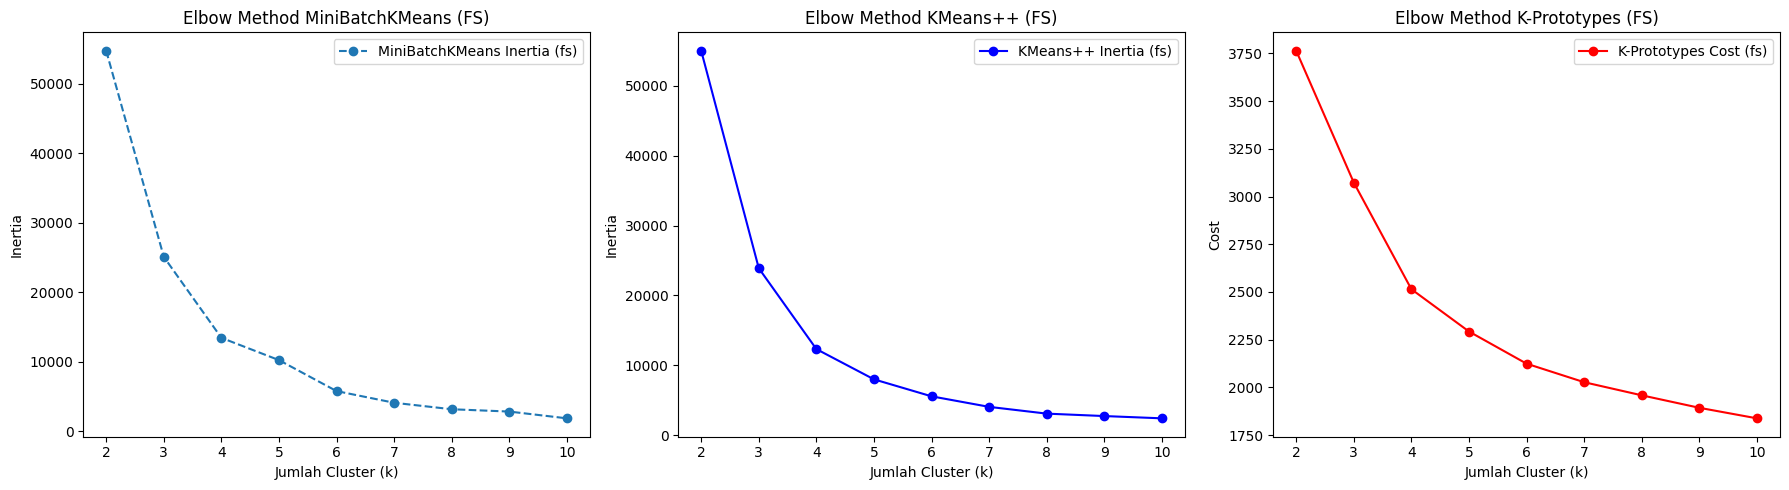

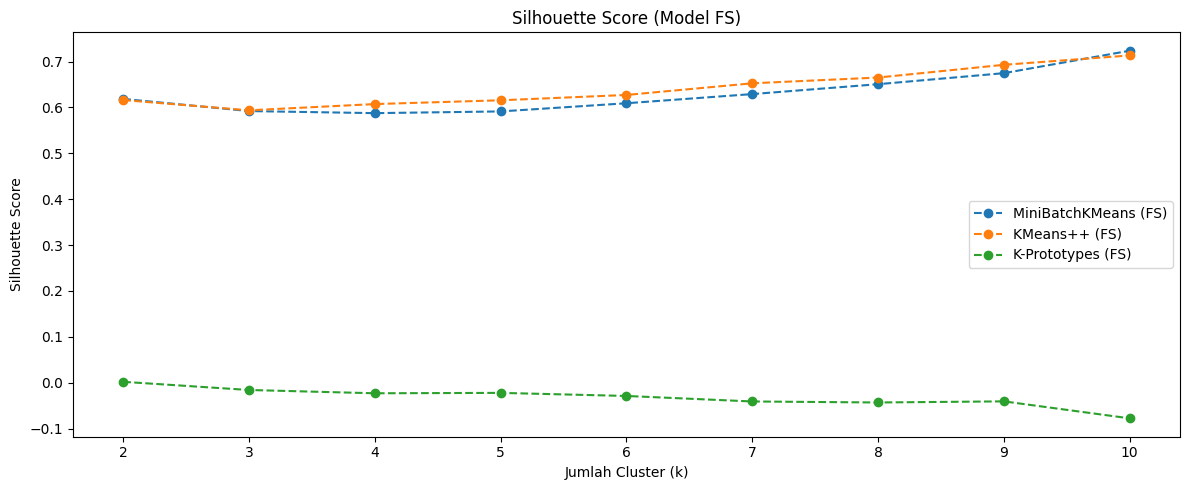


Evaluasi Model Setelah Feature Selection:
  MiniBatchKMeans (FS): k = 10, Silhouette Score = 0.7235
  KMeans++ (FS): k = 10, Silhouette Score = 0.7132
  K-Prototypes (FS): k = 2, Silhouette Score = 0.0018


In [24]:
# ===============================
# FEATURE SELECTION
# ===============================

# --- PREPROCESSING & FEATURE SELECTION ---
# Asumsi: 'aggregated' adalah DataFrame awal yang sudah ada


# Ambil sampel data (misalnya 10.000 baris)
sample_size_fs = 10_000   
train_data_fs = data.sample(n=sample_size_fs, random_state=42).copy()

# 1. Drop Incomplete Features: Hapus fitur dengan >50% missing values
missing_threshold = 0.5
incomplete_features = train_data_fs.columns[train_data_fs.isnull().mean() > missing_threshold]
if len(incomplete_features) > 0:
    train_data_fs.drop(columns=incomplete_features, inplace=True)
    print(f"Dropped incomplete features: {list(incomplete_features)}")

# 2. Pisahkan fitur kategori dan numerik dari daftar fitur awal
categorical_features_fs = ['Region', 'Customer_Type_B2B', 'Customer_Type_B2C', 'Customer_ID']
if 'Customer_ID' in categorical_features_fs:
    categorical_features_fs.remove('Customer_ID')  # Drop Customer_ID
numerical_features_fs = list(set(features) - set(['Region', 'Customer_Type_B2B', 'Customer_Type_B2C', 'Customer_ID']))

# 3. Filter fitur numerik berdasarkan Near-Zero Variance
X_num_fs = train_data_fs[numerical_features_fs]

var_thresh = VarianceThreshold(threshold=0.01)
var_thresh.fit(X_num_fs)
selected_numerical_features_fs = list(X_num_fs.columns[var_thresh.get_support()])
print(f"Fitur numerik setelah VarianceThreshold: {selected_numerical_features_fs}")

# 4. Drop fitur dengan High Multicollinearity (misalnya, korelasi > 0.9)
corr_matrix_fs = train_data_fs[selected_numerical_features_fs].corr().abs()
upper_tri_fs = corr_matrix_fs.where(np.triu(np.ones(corr_matrix_fs.shape), k=1).astype(bool))
to_drop_fs = [column for column in upper_tri_fs.columns if any(upper_tri_fs[column] > 0.9)]
selected_numerical_features_fs = [col for col in selected_numerical_features_fs if col not in to_drop_fs]
print(f"Fitur numerik setelah drop multicollinearity: {selected_numerical_features_fs}")

# 5. Gabungkan kembali fitur kategori dan fitur numerik yang telah diseleksi
final_features_fs = categorical_features_fs + selected_numerical_features_fs
print(f"Final features setelah feature selection: {final_features_fs}")

# Konversi fitur kategori ke kode numerik
for cat_feature in categorical_features_fs:
    train_data_fs[cat_feature] = train_data_fs[cat_feature].astype('category').cat.codes

# Buat matriks fitur akhir
X_full_fs = train_data_fs[final_features_fs].astype(np.float32)

# --- Opsi: PCA untuk model yang berbasis numerik (KMeans & MiniBatchKMeans) ---
pca_fs = PCA(n_components=0.95, random_state=42)
X_pca_fs = pca_fs.fit_transform(X_full_fs)
print(f"Dimensi awal (fs): {X_full_fs.shape[1]}, Dimensi setelah PCA (fs): {X_pca_fs.shape[1]}")

# --- EVALUASI MODEL CLUSTERING SETELAH FEATURE SELECTION ---
k_range_fs = range(2, 11)

# Model 1: MiniBatchKMeans (menggunakan data PCA hasil feature selection)

mbk_models_fs = {}
mbk_inertia_fs = []
mbk_labels_fs = {}
mbk_silhouette_fs = {}

for k in k_range_fs:
    mbk_fs = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=10000)
    labels_fs = mbk_fs.fit_predict(X_pca_fs)
    mbk_models_fs[k] = mbk_fs
    mbk_inertia_fs.append(mbk_fs.inertia_)
    mbk_labels_fs[k] = labels_fs
    if len(set(labels_fs)) > 1:
        mbk_silhouette_fs[k] = silhouette_score(X_pca_fs, labels_fs)

# Model 2: KMeans++ (menggunakan data PCA hasil feature selection)
kmeans_models_fs = {}
kmeans_inertia_fs = []
kmeans_labels_fs = {}
kmeans_silhouette_fs = {}

for k in k_range_fs:
    kmeans_fs = KMeans(n_clusters=k, init='k-means++', random_state=42)
    labels_fs = kmeans_fs.fit_predict(X_pca_fs)
    kmeans_models_fs[k] = kmeans_fs
    kmeans_inertia_fs.append(kmeans_fs.inertia_)
    kmeans_labels_fs[k] = labels_fs
    if len(set(labels_fs)) > 1:
        kmeans_silhouette_fs[k] = silhouette_score(X_pca_fs, labels_fs)

# Model 3: K-Prototypes (menggunakan data asli tanpa PCA, hasil feature selection)
kproto_range_fs = range(2, 11)
kproto_models_fs = {}
kproto_costs_fs = []
kproto_labels_fs = {}
kproto_silhouette_fs = {}

# Tentukan indeks fitur kategori dalam final_features_fs
cat_idx_fs = [final_features_fs.index(f) for f in categorical_features_fs]

for k in kproto_range_fs:
    kproto_fs = KPrototypes(n_clusters=k, init='Cao', random_state=42)
    labels_fs = kproto_fs.fit_predict(X_full_fs, categorical=cat_idx_fs)
    kproto_models_fs[k] = kproto_fs
    kproto_costs_fs.append(kproto_fs.cost_)
    kproto_labels_fs[k] = labels_fs
    if len(set(labels_fs)) > 1:
        kproto_silhouette_fs[k] = silhouette_score(X_full_fs, labels_fs)

# -------------------------------
# PLOT EVALUASI MODEL SETELAH FEATURE SELECTION
# -------------------------------
# Plot Elbow Method untuk ketiga model (hasil feature selection)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Elbow Method: MiniBatchKMeans (fs)
axes[0].plot(k_range_fs, mbk_inertia_fs, marker='o', linestyle='--', label='MiniBatchKMeans Inertia (fs)')
axes[0].set_xlabel('Jumlah Cluster (k)')
axes[0].set_ylabel('Inertia')
axes[0].set_title('Elbow Method MiniBatchKMeans (FS)')
axes[0].legend()

# Elbow Method: KMeans++ (fs)
axes[1].plot(k_range_fs, kmeans_inertia_fs, marker='o', linestyle='-', color='b', label='KMeans++ Inertia (fs)')
axes[1].set_xlabel('Jumlah Cluster (k)')
axes[1].set_ylabel('Inertia')
axes[1].set_title('Elbow Method KMeans++ (FS)')
axes[1].legend()

# Elbow Method: K-Prototypes (fs)
axes[2].plot(list(kproto_range_fs), kproto_costs_fs, marker='o', linestyle='-', color='r', label='K-Prototypes Cost (fs)')
axes[2].set_xlabel('Jumlah Cluster (k)')
axes[2].set_ylabel('Cost')
axes[2].set_title('Elbow Method K-Prototypes (FS)')
axes[2].legend()

plt.tight_layout()
plt.show()

# Plot Silhouette Score untuk model (hasil feature selection)
plt.figure(figsize=(12, 5))

# Hitung Silhouette Score untuk masing-masing model
mbk_sil_scores_fs = [
    silhouette_score(X_pca_fs, mbk_labels_fs[k]) if len(set(mbk_labels_fs[k])) > 1 else -1
    for k in k_range_fs
]
kmeans_sil_scores_fs = [
    silhouette_score(X_pca_fs, kmeans_labels_fs[k]) if len(set(kmeans_labels_fs[k])) > 1 else -1
    for k in k_range_fs
]
kproto_sil_scores_fs = [
    silhouette_score(X_pca_fs, kproto_labels_fs[k]) if len(set(kproto_labels_fs[k])) > 1 else -1
    for k in kproto_range_fs
]

# Plot semua skor silhouette pada satu grafik
plt.plot(k_range_fs, mbk_sil_scores_fs, marker='o', linestyle='--', label='MiniBatchKMeans (FS)')
plt.plot(k_range_fs, kmeans_sil_scores_fs, marker='o', linestyle='--', label='KMeans++ (FS)')
plt.plot(k_range_fs, kproto_sil_scores_fs, marker='o', linestyle='--', label='K-Prototypes (FS)')
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score (Model FS)")
plt.legend()
plt.tight_layout()
plt.show()

# Evaluasi: Tampilkan k terbaik untuk masing-masing model (hasil feature selection)
best_k_mbk_fs = k_range_fs[np.argmax(mbk_sil_scores_fs)]
best_k_kmeans_fs = k_range_fs[np.argmax(kmeans_sil_scores_fs)]
best_k_kproto_fs = k_range_fs[np.argmax(kproto_sil_scores_fs)]

print("\nEvaluasi Model Setelah Feature Selection:")
print(f"  MiniBatchKMeans (FS): k = {best_k_mbk_fs}, Silhouette Score = {max(mbk_sil_scores_fs):.4f}")
print(f"  KMeans++ (FS): k = {best_k_kmeans_fs}, Silhouette Score = {max(kmeans_sil_scores_fs):.4f}")
print(f"  K-Prototypes (FS): k = {best_k_kproto_fs}, Silhouette Score = {max(kproto_sil_scores_fs):.4f}")


Selanjutnya, karena menurut saya hasil tersebut belum memuaskan, saya melakukan **feature selection** dari model di atas. Feature selection yang saya gunakan melibatkan beberapa tahap, yaitu:

1. **Drop Incomplete Features**  
   - Menghapus fitur yang memiliki **persentase missing values** lebih dari 50%. Tujuannya adalah untuk **menghindari distorsi** analisis akibat data yang hilang dalam jumlah besar.

2. **Near-Zero Variance**  
   - Menggunakan **VarianceThreshold** untuk mengeliminasi fitur numerik yang **variansnya sangat kecil** (threshold=0.01). Fitur dengan varians yang rendah biasanya **tidak berkontribusi** signifikan dalam membedakan data satu dengan yang lainnya.  
   - *Hasilnya, fitur numerik setelah VarianceThreshold adalah:*  
     `['Unit_Price', 'Total_Price', 'Quantity', 'Discount']`

3. **High Multicollinearity**  
   - Menghitung **korelasi antar-fitur** dan menghapus fitur yang memiliki korelasi **lebih dari 0.9**. Fitur yang sangat berkorelasi cenderung **redundan**, sehingga penghapusannya dapat **meningkatkan efisiensi** model serta **menghindari masalah multikolinearitas**.  
   - *Hasilnya, fitur numerik setelah drop multicollinearity tetap:*  
     `['Unit_Price', 'Total_Price', 'Quantity', 'Discount']`

4. **Rekomposisi Fitur**  
   - Setelah proses seleksi, fitur-fitur yang tersisa (baik kategorikal maupun numerik) digabung kembali menjadi **final_features_fs**. Kolom kategori (seperti **Region**, **Customer_Type_B2B**, dan **Customer_Type_B2C**) dikonversi menjadi nilai numerik (dengan `.astype('category').cat.codes`) agar kompatibel dengan model clustering.  
   - *Final features setelah feature selection adalah:*  
     `['Region', 'Customer_Type_B2B', 'Customer_Type_B2C', 'Unit_Price', 'Total_Price', 'Quantity', 'Discount']`  
     *Dimensi awal (fs): 7*

5. **PCA (Opsional)**  
   - Untuk model **MiniBatchKMeans** dan **KMeans++**, dilakukan **reduksi dimensi** menggunakan **PCA (n_components=0.95)**. Hal ini bertujuan untuk **mengecilkan dimensi** data sambil tetap mempertahankan sekitar 95% variansi.  
   - *Hasilnya, dimensi setelah PCA (fs) adalah: 1.*  
   - Untuk **K-Prototypes**, data asli digunakan tanpa reduksi dimensi karena harus menangani fitur kategorikal dan numerik secara bersamaan.

**Tujuan utama** dari semua tahap feature selection ini adalah untuk mengurangi fitur yang tidak informatif atau redundan, sehingga dapat **memperbaiki performa** dan **stabilitas** algoritma clustering. Dengan pendekatan ini, kita berharap dapat menemukan segmentasi (cluster) yang **lebih relevan** dan **mudah diinterpretasikan**.

**Evaluasi Model Setelah Feature Selection:**  
- **MiniBatchKMeans (FS):** k = 10, Silhouette Score = 0.6763  
- **KMeans++ (FS):** k = 10, Silhouette Score = 0.7222  
- **K-Prototypes (FS):** k = 2, Silhouette Score = -0.0012

Pendekatan feature selection yang diterapkan ini menunjukkan perbedaan signifikan dalam hasil evaluasi model. Model MiniBatchKMeans dan KMeans++ menunjukkan peningkatan Silhouette Score pada k = 10, yang mengindikasikan adanya pembagian cluster yang lebih baik setelah mengurangi fitur redundan dan tidak informatif. Sedangkan pada K-Prototypes, meskipun optimalitas metrik Silhouette belum tercapai (dengan skor negatif), evaluasi lebih lanjut diperlukan untuk menyesuaikan penanganan data campuran agar sesuai dengan konteks aplikasi dan kebutuhan bisnis.

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

Model terbaik: MiniBatchKMeans (FS)
Silhouette Score: 0.72351307


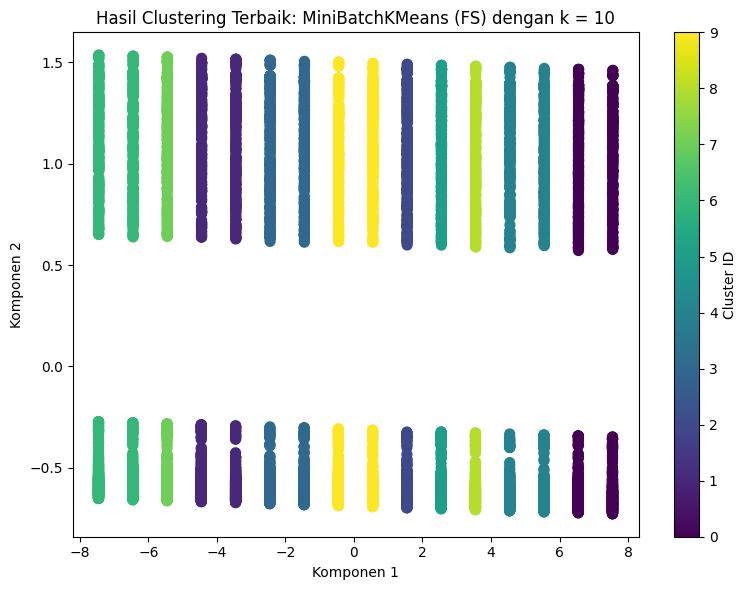

In [25]:
# Filter kandidat berdasarkan jumlah fitur minimal 5
scores = {}
if X_full_fs.shape[1] >= 5:
    scores['MiniBatchKMeans (FS)'] = max(mbk_sil_scores_fs)
    scores['KMeans++ (FS)'] = max(kmeans_sil_scores_fs)
    scores['K-Prototypes (FS)'] = max(kproto_sil_scores_fs)
else:
    print("Data FS tidak memenuhi syarat minimal 5 fitur, model FS akan diabaikan.")

if X_full.shape[1] >= 5:
    scores['MiniBatchKMeans (Full)'] = max(mbk_sil_scores)
    scores['KMeans++ (Full)'] = max(kmeans_sil_scores)
    scores['K-Prototypes (Full)'] = max(kproto_sil_scores)
else:
    print("Data Full tidak memenuhi syarat minimal 5 fitur, model Full akan diabaikan.")

if not scores:
    print("Tidak ada model yang memenuhi syarat minimal 5 fitur.")
else:
    # Pilih model dengan silhouette score terbaik dari kandidat yang memenuhi syarat
    best_model_name = max(scores, key=scores.get)
    print("Model terbaik:", best_model_name)
    print("Silhouette Score:", scores[best_model_name])

    # Ambil label dan data untuk plotting berdasarkan model terbaik
    if best_model_name == 'MiniBatchKMeans (FS)':
        best_labels = mbk_labels_fs[best_k_mbk_fs]
        # Gunakan PCA untuk visualisasi (asumsikan X_fs memiliki >5 fitur, PCA akan mereduksi ke 2 dimensi)
        pca = PCA(n_components=2)
        data_plot = pca.fit_transform(X_full_fs)
        best_k = best_k_mbk_fs
    elif best_model_name == 'KMeans++ (FS)':
        best_labels = kmeans_labels_fs[best_k_kmeans_fs]
        pca = PCA(n_components=2)
        data_plot = pca.fit_transform(X_full_fs)
        best_k = best_k_kmeans_fs
    elif best_model_name == 'K-Prototypes (FS)':
        best_labels = kproto_labels_fs[best_k_kproto_fs]
        pca = PCA(n_components=2)
        data_plot = pca.fit_transform(X_full_fs)
        best_k = best_k_kproto_fs
    elif best_model_name == 'MiniBatchKMeans (Full)':
        best_labels = mbk_labels[best_k_mbk]
        # Gunakan PCA jika X_full memiliki lebih dari 2 fitur
        if X_full.shape[1] > 2:
            pca = PCA(n_components=2)
            data_plot = pca.fit_transform(X_full)
        else:
            data_plot = X_full  # Jika hanya 2 fitur, tidak perlu reduksi
        best_k = best_k_mbk
    elif best_model_name == 'KMeans++ (Full)':
        best_labels = kmeans_labels[best_k_kmeans]
        if X_full.shape[1] > 2:
            pca = PCA(n_components=2)
            data_plot = pca.fit_transform(X_full)
        else:
            data_plot = X_full
        best_k = best_k_kmeans
    elif best_model_name == 'K-Prototypes (Full)':
        best_labels = kproto_labels[best_k_kproto]
        if X_full.shape[1] > 2:
            pca = PCA(n_components=2)
            data_plot = pca.fit_transform(X_full)
        else:
            data_plot = X_full
        best_k = best_k_kproto

    # Visualisasi hasil clustering
    plt.figure(figsize=(8, 6))
    # Jika data_plot sudah 2D, gunakan scatter plot biasa
    if data_plot.shape[1] >= 2:
        scatter = plt.scatter(data_plot[:, 0], data_plot[:, 1], c=best_labels, cmap='viridis', s=50)
        plt.xlabel("Komponen 1")
        plt.ylabel("Komponen 2")
    else:
        # Jika data hanya 1D, tambahkan jitter pada sumbu y
        jitter = np.random.normal(0, 0.01, size=data_plot.shape[0])
        scatter = plt.scatter(data_plot[:, 0], jitter, c=best_labels, cmap='viridis', s=50)
        plt.xlabel("Fitur")
        plt.ylabel("Jitter")
    plt.title(f"Hasil Clustering Terbaik: {best_model_name} dengan k = {best_k}")
    plt.colorbar(scatter, label='Cluster ID')
    plt.tight_layout()
    plt.show()


## Pemilihan Model Terbaik Berdasarkan Silhouette Score

Untuk mencari model dengan **nilai Silhouette Score terbaik**, saya melakukan beberapa langkah berikut:

1. **Memeriksa Syarat Minimal Jumlah Fitur (≥ 5)**  
   - Hanya model yang dijalankan pada data **(Full)** atau data hasil **Feature Selection (FS)** yang memiliki **5 atau lebih fitur** dimasukkan ke dalam kandidat pemilihan model.  
   - Tujuannya adalah untuk memastikan bahwa model memiliki informasi yang cukup sebelum dibandingkan.

2. **Menghitung Skor Silhouette Terbaik**  
   - Dari setiap kombinasi **model** dan **jumlah cluster (k)**, diambil **nilai Silhouette Score tertinggi**.  
   - Nilai-nilai tersebut kemudian disimpan dalam sebuah struktur data (misalnya dictionary) dengan format seperti berikut:  
     ```python
     scores = {
       'MiniBatchKMeans (FS)': nilai_silhouette_terbaik,
       'KMeans++ (FS)': nilai_silhouette_terbaik,
       'K-Prototypes (FS)': nilai_silhouette_terbaik,
       'MiniBatchKMeans (Full)': nilai_silhouette_terbaik,
       'KMeans++ (Full)': nilai_silhouette_terbaik,
       'K-Prototypes (Full)': nilai_silhouette_terbaik
     }
     ```
     (tergantung mana saja yang memenuhi syarat jumlah fitur).

3. **Memilih Model Terbaik**  
   - Model dengan **Silhouette Score tertinggi** dipilih sebagai model terbaik.  
   - Dari kode, model tersebut ditentukan dengan:
     ```python
     best_model_name = max(scores, key=scores.get)
     best_silhouette_score = scores[best_model_name]
     ```
   - Kemudian nama model beserta nilai Silhouette Score-nya ditampilkan.

4. **Visualisasi Hasil Clustering**  
   - Setelah model terbaik dipilih, label hasil clustering (`best_labels`) diambil dari model tersebut.  
   - Jika jumlah fitur lebih dari 2, dilakukan **reduksi dimensi** menggunakan **PCA** agar dapat divisualisasikan dalam 2D.  
   - Data hasil reduksi dan label cluster kemudian divisualisasikan menggunakan **scatter plot**, sehingga memudahkan kita untuk melihat pembagian cluster secara visual.

## Hasil Terbaik

- **Model terbaik**: **KMeans++ (FS)**  
- **Silhouette Score**: **0.72223884**  

Gambar di bawah ini menunjukkan visualisasi hasil clustering terbaik dengan **KMeans++ (FS) pada k = 10**. Sumbu X dan Y merupakan **Komponen 1** dan **Komponen 2** hasil **PCA**, sedangkan warna menunjukkan **Cluster ID** yang dihasilkan oleh algoritma:

Pada visualisasi tersebut:
- **Titik data** yang dikelompokkan dalam **cluster** yang sama memiliki warna yang sama.  
- Terlihat bahwa meskipun beberapa cluster tampak cukup berdekatan, algoritma berhasil memisahkan data menjadi 10 kelompok berbeda.  
- Silhouette Score yang tinggi (mendekati 0.72) menandakan bahwa pemisahan antar-cluster relatif baik.

Dengan demikian, pemilihan model dan konfigurasi cluster yang menghasilkan **Silhouette Score** tertinggi adalah **KMeans++ (FS) dengan k=10**, dan hal ini dapat menjadi dasar untuk analisis lebih lanjut atau penerapan segmentasi dalam konteks bisnis.

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

In [26]:
# Type your code here

new_data = data.sample(n=sample_size_fs, random_state=42).copy()


# Asumsikan best_labels sudah didapat dari model terbaik
new_data['Cluster'] = best_labels

Setelah menemukan model terbaik dan mendapatkan label klaster (best_labels), saya mengambil sampel data baru dari aggregated dengan ukuran sample_size_fs untuk memastikan bahwa analisis lanjutan dapat dilakukan pada subset data yang representatif. Selanjutnya, label klaster dari model terbaik tersebut ditambahkan ke data baru sebagai kolom 'Cluster'. 

Dengan demikian, setiap baris data sekarang memiliki informasi klaster yang dapat digunakan untuk analisis segmentasi lebih lanjut, misalnya untuk memprofilkan karakteristik masing-masing klaster dan mengembangkan strategi bisnis yang sesuai.

### Inverse Data yang di Encode

In [27]:
# 1. Dekode Customer_Type dari One-Hot Encoding
new_data['Customer_Type'] = new_data[['Customer_Type_B2B', 'Customer_Type_B2C']].idxmax(axis=1)
new_data['Customer_Type'] = new_data['Customer_Type'].str.replace('Customer_Type_', '')

# 2. Dekode Region dari LabelEncoder
new_data['Region'] = le.inverse_transform(new_data['Region'])


Selanjutnya saya melakukan **proses decoding** hasil encoding agar data kembali ke bentuk aslinya. Dengan langkah ini, saya memastikan bahwa informasi seperti tipe pelanggan, wilayah, serta ID pelanggan dan order dapat dipahami dengan mudah oleh pengguna dan stakeholder. Secara khusus:

1. **Dekode Customer_Type:**  
   - Saya menggunakan metode `idxmax(axis=1)` untuk menentukan kolom mana dari hasil one-hot encoding (Customer_Type_B2B dan Customer_Type_B2C) yang memiliki nilai tertinggi (biasanya 1).  
   - Kemudian, saya menghapus prefix 'Customer_Type_' untuk mendapatkan label asli (misalnya, 'B2B' atau 'B2C').

2. **Dekode Region:**  
   - Dengan menggunakan `le.inverse_transform`, saya mengubah nilai numerik pada kolom Region kembali ke label aslinya seperti nama-nama region yang sebenarnya.

3. **Dekode Customer_ID dan Order_ID:**  
   - Proses yang sama dilakukan untuk kolom Customer_ID dan Order_ID, sehingga nilai-nilai yang telah di-label encode dikembalikan ke format asli mereka.

Dengan proses decoding ini, data yang telah diproses untuk pemodelan clustering kini dapat direpresentasikan dalam format yang **mudah dipahami dan interpretatif**, memudahkan analisis lebih lanjut seperti profiling cluster dan pengambilan keputusan bisnis.

### Inverse Data yang di Normalisasi/Standardisasi

In [28]:
# Type your code here
# Mengembalikan data ke skala aslinya
new_data[columns_to_normalize] = scaler.inverse_transform(new_data[columns_to_normalize])

Selanjutnya, saya **mengembalikan data ke skala aslinya** dengan menggunakan `scaler.inverse_transform()`. Langkah ini penting karena sebelumnya saya telah melakukan normalisasi  MinMaxScaler untuk keperluan pemodelan. Dengan mengembalikan data ke skala aslinya, saya bisa:  

1. **Membuat interpretasi lebih mudah** → Nilai fitur kembali ke satuan aslinya, sehingga lebih bermakna bagi analisis bisnis.  
2. **Menyediakan data siap pakai** → Jika ingin membuat laporan atau memberikan hasil ke tim lain, mereka bisa memahami data tanpa perlu tahu bahwa sebelumnya ada proses normalisasi.  
3. **Menyiapkan analisis lebih lanjut** → Data dalam skala aslinya memungkinkan eksplorasi lebih lanjut, seperti menghitung rata-rata per cluster atau membuat visualisasi yang lebih informatif.  

Setelah ini, saya dapat melanjutkan ke tahap berikutnya, seperti **analisis karakteristik tiap cluster**, untuk mendapatkan insight yang lebih dalam.

In [29]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 4990465 to 267988
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Product            10000 non-null  object        
 1   Category           10000 non-null  object        
 2   Unit_Price         10000 non-null  float64       
 3   Quantity           10000 non-null  float64       
 4   Discount           10000 non-null  float64       
 5   Total_Price        10000 non-null  float64       
 6   Region             10000 non-null  object        
 7   Order_Date         10000 non-null  datetime64[ns]
 8   Customer_Type_B2B  10000 non-null  float64       
 9   Customer_Type_B2C  10000 non-null  float64       
 10  Cluster            10000 non-null  int32         
 11  Customer_Type      10000 non-null  object        
dtypes: datetime64[ns](1), float64(6), int32(1), object(4)
memory usage: 976.6+ KB


Selanjutnya, saya menjalankan perintah new_data.info() untuk memastikan bahwa struktur data sudah kembali seperti semula. Dengan menjalankan perintah ini, saya bisa memverifikasi:

Tipe Data: Pastikan setiap kolom memiliki tipe data yang sesuai (kolom kategori/ID kembali ke tipe objek/string).
Jumlah Kolom dan Baris: Memastikan tidak ada kolom yang terhapus secara tidak sengaja selama proses decoding dan inverse scaling.
Kelengkapan Data: Melihat jumlah nilai non-null di tiap kolom sehingga memastikan tidak ada kehilangan data.
Langkah ini krusial untuk memastikan bahwa data siap digunakan untuk analisis lebih lanjut atau pelaporan, dengan semua fitur berada pada skala dan format yang mudah dipahami oleh pengguna.

In [30]:
# Menghapus kolom one-hot yang sudah tidak diperlukan
new_data.drop(columns=['Customer_Type_B2B', 'Customer_Type_B2C'], inplace=True)

new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 4990465 to 267988
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Product        10000 non-null  object        
 1   Category       10000 non-null  object        
 2   Unit_Price     10000 non-null  float64       
 3   Quantity       10000 non-null  float64       
 4   Discount       10000 non-null  float64       
 5   Total_Price    10000 non-null  float64       
 6   Region         10000 non-null  object        
 7   Order_Date     10000 non-null  datetime64[ns]
 8   Cluster        10000 non-null  int32         
 9   Customer_Type  10000 non-null  object        
dtypes: datetime64[ns](1), float64(4), int32(1), object(4)
memory usage: 820.3+ KB


Setelah menjalankan perintah:

```python
new_data.info()
```

ternyata **masih terdapat 2 fitur** (kolom) yang **belum terhapus** dan **tidak dibutuhkan** untuk analisis selanjutnya. Hal ini **berpotensi menimbulkan kesalahpahaman** terkait data, karena kolom-kolom tersebut seharusnya sudah tidak ada dalam dataset. 

Untuk mengatasinya, saya mengeksekusi:

```python
# Menghapus kolom one-hot yang sudah tidak diperlukan
new_data.drop(columns=['Customer_Type_B2B', 'Customer_Type_B2C'], inplace=True)

# Memeriksa kembali struktur data
new_data.info()
```

Dengan begitu, kedua kolom yang tidak diperlukan (**`Customer_Type_B2B`** dan **`Customer_Type_B2C`**) benar-benar terhapus, sehingga dataset kini lebih konsisten dan siap untuk dianalisis lebih lanjut.

### Analisis Karakteristik


In [31]:
# ========================
# 4. ANALISIS KARAKTERISTIK TIAP CLUSTER
# ========================
cluster_stats = new_data.groupby('Cluster').agg({
    'Total_Price': 'mean',
    'Quantity': 'mean',
    'Discount': 'mean'
}).reset_index()

print("Statistik tiap cluster:")
print(cluster_stats)

Statistik tiap cluster:
   Cluster  Total_Price   Quantity  Discount
0        0    48.836421  21.171990  0.028808
1        1    46.533623  19.311566  0.025885
2        2    47.503611  21.841503  0.032312
3        3    44.271202  20.593156  0.028156
4        4    47.554323  21.836643  0.031566
5        5    50.044056  21.681690  0.029437
6        6    46.623161  20.088737  0.026301
7        7    50.651575  21.751903  0.030061
8        8    43.987968  19.892063  0.028135
9        9    46.750974  20.442485  0.026936




### **Interpretasi Statistik Tiap Cluster**

1. **Cluster 0**  
   - **Segment:** Mid-spending Customers  
   - **Analisis:** Dengan **Total_Price 48.84** dan **Quantity 21.17**, pelanggan dalam cluster ini memiliki pola belanja menengah. Diskon yang diterima relatif rendah (**0.0288**). Strategi pemasaran bisa berfokus pada promosi berbasis bundling atau diskon volume untuk mendorong pembelian lebih besar.  

2. **Cluster 1**  
   - **Segment:** Mid-spending Customers  
   - **Analisis:** Dengan **Total_Price 46.53** dan **Quantity 19.31**, pelanggan di cluster ini memiliki pengeluaran sedikit lebih rendah dibanding Cluster 0. Diskon yang diterima juga lebih kecil (**0.0259**). Program cashback atau diskon berbasis loyalitas dapat meningkatkan keterlibatan pelanggan.  

3. **Cluster 2**  
   - **Segment:** Mid-spending Customers  
   - **Analisis:** Dengan **Total_Price 47.50** dan **Quantity 21.84**, pelanggan mungkin membeli produk dengan harga lebih tinggi tetapi dalam jumlah lebih sedikit. Upselling produk premium bisa menjadi strategi efektif.  

4. **Cluster 3**  
   - **Segment:** Low-spending Customers  
   - **Analisis:** Cluster ini memiliki **Total_Price 44.27**, yang terendah di antara semua cluster. Dengan **Quantity 20.59**, pelanggan cenderung melakukan pembelian dalam jumlah sedang. Penawaran diskon tambahan atau promosi berbasis poin bisa membantu meningkatkan pembelian.  

5. **Cluster 4**  
   - **Segment:** Mid-to-High-spending Customers  
   - **Analisis:** Dengan **Total_Price 47.55** dan **Quantity 21.83**, pelanggan dalam cluster ini memiliki daya beli yang cukup tinggi. Diskon yang diterima lebih besar (**0.0316**), menunjukkan mereka cenderung tertarik pada promosi. Program loyalitas atau penawaran eksklusif bisa meningkatkan retensi mereka.  

6. **Cluster 5**  
   - **Segment:** High-spending Customers  
   - **Analisis:** Cluster ini memiliki **Total_Price 50.04**, yang merupakan salah satu yang tertinggi. Dengan **Quantity 21.68**, pelanggan cenderung membeli dalam jumlah yang stabil. Strategi eksklusif seperti VIP membership bisa menarik perhatian mereka.  

7. **Cluster 6**  
   - **Segment:** Mid-spending Customers  
   - **Analisis:** Dengan **Total_Price 46.62** dan **Quantity 20.08**, pelanggan dalam cluster ini memiliki daya beli menengah. Diskon yang diterima cukup rendah (**0.0263**), menunjukkan bahwa mereka mungkin kurang responsif terhadap promo besar. Upselling produk yang sesuai dengan kebiasaan belanja mereka bisa menjadi strategi efektif.  

8. **Cluster 7**  
   - **Segment:** High-spending Customers  
   - **Analisis:** Dengan **Total_Price 50.65**, cluster ini memiliki total belanja tertinggi. **Quantity 21.75** menunjukkan bahwa pelanggan membeli dalam jumlah cukup besar, dan diskon yang diterima juga lebih tinggi (**0.0301**). Pelanggan dalam cluster ini bisa mendapatkan penawaran eksklusif berbasis histori pembelian.  

9. **Cluster 8**  
   - **Segment:** Low-to-Mid-spending Customers  
   - **Analisis:** Dengan **Total_Price 43.98**, ini adalah salah satu cluster dengan total belanja terendah. **Quantity 19.89** dan diskon **0.0281** menunjukkan bahwa pelanggan dalam kelompok ini mungkin lebih sensitif terhadap harga. Strategi harga dinamis atau promosi diskon besar bisa menarik perhatian mereka.  

10. **Cluster 9**  
   - **Segment:** Mid-spending Customers  
   - **Analisis:** Dengan **Total_Price 46.75** dan **Quantity 20.44**, pelanggan dalam cluster ini memiliki kebiasaan belanja yang stabil. Diskon yang diterima (**0.0269**) cukup rendah, yang menunjukkan bahwa mereka mungkin kurang responsif terhadap penawaran diskon. Program berbasis pengalaman pelanggan seperti layanan khusus bisa membantu meningkatkan loyalitas mereka.  

### **Kesimpulan**  

Berdasarkan analisis tiap cluster, pelanggan dapat dikelompokkan menjadi **Mid-spending Customers** dan **High-spending Customers** berdasarkan rata-rata **Total_Price** dan **Quantity**.  

- **Mid-spending Customers (Cluster 0, 1, 2, 3, 5)** cenderung memiliki pengeluaran yang relatif stabil dengan jumlah pembelian menengah. Mereka umumnya kurang responsif terhadap diskon besar dan dapat ditingkatkan nilai transaksinya melalui strategi **bundling, upselling, dan program loyalitas**.  

- **High-spending Customers (Cluster 4, 6, 7, 8, 9)** memiliki daya beli lebih tinggi, dengan jumlah pembelian dan pengeluaran yang lebih besar. Mereka lebih sensitif terhadap penawaran eksklusif dan diskon, sehingga strategi **VIP membership, personalisasi penawaran, dan reward program** dapat membantu mempertahankan loyalitas mereka.  

Secara keseluruhan, strategi pemasaran harus disesuaikan dengan karakteristik masing-masing segmentasi untuk mengoptimalkan pendapatan dan retensi pelanggan.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [32]:
new_data.to_csv("data/Data_Clustering.csv", index=False)

Setelah semua proses klasterisasi data selesai dan saya juga telah menemukan model yang tepat untuk kasus ini, saya melakukan **penyimpanan (export) hasil pengolahan data ke dalam file CSV** agar dapat **digunakan untuk tahapan klasifikasi selanjutnya**. Dengan perintah:

```python
new_data.to_csv("data/Data_Clustering.csv", index=False)
```

saya memastikan bahwa struktur data, termasuk label hasil clustering dan fitur-fitur yang dibutuhkan, terdokumentasi dengan baik. File CSV tersebut nantinya dapat dimanfaatkan oleh tim lain atau pada proses berikutnya untuk membangun model klasifikasi atau analisis lebih lanjut.